In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

In [10]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [32]:
 Ravdess = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"

## Select 500 audios files (~approx ratio of 250:250) with below Filename identifiers

In [33]:
import os
import shutil

name = ('03-01-03-01-01-01',
        '03-01-03-01-01-02',
        '03-01-03-01-02-01',
        '03-01-03-01-02-02',
        '03-01-03-02-01-01',
        '03-01-03-02-01-02',
        '03-01-03-02-02-01',
        '03-01-03-02-02-02',
        '03-01-04-01-01-01',
        '03-01-04-01-01-02',
        '03-01-04-01-02-01',
        '03-01-04-01-02-02',
        '03-01-04-02-01-01',
        '03-01-04-02-01-02',
        '03-01-04-02-02-01',
        '03-01-04-02-02-02')

i = 1

In [102]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])

Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head(8)

Emotions                                               Path
0  surprise  /kaggle/input/ravdess-emotional-speech-audio/a...
1   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
2   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
3   disgust  /kaggle/input/ravdess-emotional-speech-audio/a...
4   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...
5      fear  /kaggle/input/ravdess-emotional-speech-audio/a...
6       sad  /kaggle/input/ravdess-emotional-speech-audio/a...
7   neutral  /kaggle/input/ravdess-emotional-speech-audio/a...

In [95]:
R= Ravdess_df[(Ravdess_df['Emotions'] == 'happy')]


In [83]:
R

Emotions                                               Path
9       happy  /kaggle/input/ravdess-emotional-speech-audio/a...
12      happy  /kaggle/input/ravdess-emotional-speech-audio/a...
19      happy  /kaggle/input/ravdess-emotional-speech-audio/a...
23      happy  /kaggle/input/ravdess-emotional-speech-audio/a...
31      happy  /kaggle/input/ravdess-emotional-speech-audio/a...
...       ...                                                ...
1406    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
1409    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
1411    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
1420    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
1432    happy  /kaggle/input/ravdess-emotional-speech-audio/a...

[192 rows x 2 columns]

In [96]:
Rs= Ravdess_df[(Ravdess_df['Emotions'] == 'sad')]
Rs

Emotions                                               Path
6         sad  /kaggle/input/ravdess-emotional-speech-audio/a...
18        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
36        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
38        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
50        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
...       ...                                                ...
1404      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1408      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1417      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1419      sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1437      sad  /kaggle/input/ravdess-emotional-speech-audio/a...

[192 rows x 2 columns]

In [97]:
R= Rs.append(R,ignore_index=True)
R

Emotions                                               Path
0        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
1        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
2        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
3        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
4        sad  /kaggle/input/ravdess-emotional-speech-audio/a...
..       ...                                                ...
379    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
380    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
381    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
382    happy  /kaggle/input/ravdess-emotional-speech-audio/a...
383    happy  /kaggle/input/ravdess-emotional-speech-audio/a...

[384 rows x 2 columns]

In [98]:
 Ravdess_df = R

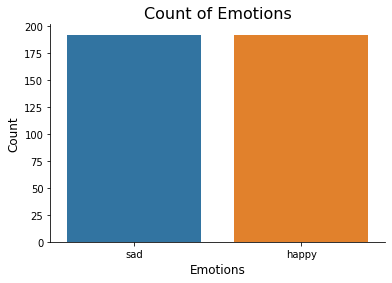

In [100]:
plt.title('Count of Emotions', size=16)
sns.countplot( Ravdess_df.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [101]:
from sklearn.preprocessing import minmax_scale
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

## Task 1: 
 - Select 3 or 4 audio files of happy and sad, generate following plots and explain the inferences in 1-2 lines,
- a. Waveform
- b. Spectrogram on log
- c. Zero Crossing rates
- d. Spectral Centroids
- e. Spectral Bandwidth
- f. MFCC

In [44]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def create_mel_Spectogram(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Mel Spectrogram of audio {} emotion'.format(e), size=15)
    mel_spec = librosa.feature.melspectrogram(y=data, sr=sr)
    librosa.display.specshow(mel_spec, sr=sr, x_axis='time')
    plt.show()

    
def create_Spectogram(data, sr, e): # have to check which is spect on log
    
    plt.figure(figsize=(10, 3))
    plt.title('Spectrogram of audio {} emotion'.format(e), size=15)
    X = librosa.stft(data)
    
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb,sr = sr, x_axis="time",y_axis = "log")
    plt.show() 
        
    
def create_Zero_crossing_rate(data, sr, e):
    
    zero_crossings = librosa.zero_crossings(data)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(10, 3))
    plt.title('Zero Crossing Rate of audio {} emotion'.format(e), size=15)
    zcrs = librosa.feature.zero_crossing_rate(data)
    plt.plot(zcrs[0])
    plt.show()    
    
def create_mfcc(data, sr,e):
    
    plt.figure(figsize=(10, 3))
    plt.title('MFCC of audio {} emotion'.format(e), size=15)
    mfccs = librosa.feature.mfcc(y=data, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()
    
def create_Spectral_bandwidth(data, sr,e):
    
    plt.figure(figsize=(10, 3))
    plt.title('Spectral Bandwidth of audio {} emotion'.format(e), size=15)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=data, sr=sr)[0]
    frames = range(len(spectral_bandwidth))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_bandwidth), color='r')
    plt.show()
   
    
def create_Spectral_centroid(data, sr,e):

    plt.figure(figsize=(10, 3))
    plt.title('Spectral Centroids of audio {} emotion'.format(e), size=15)
    spectral_centroids = librosa.feature.spectral_centroid(data, sr=sr)[0]
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    librosa.display.waveshow(data, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.show()    
    

 Happy 1: 


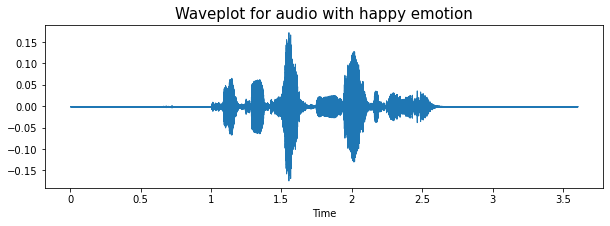

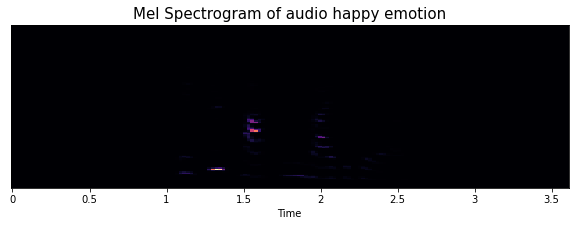

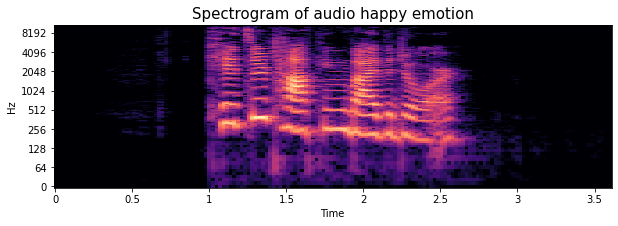

Sum of zero crossing  28868


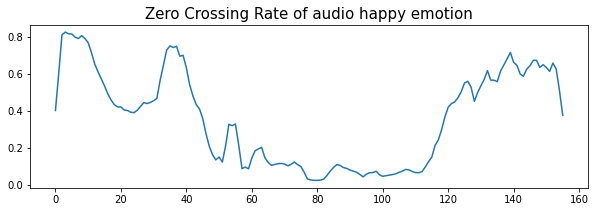

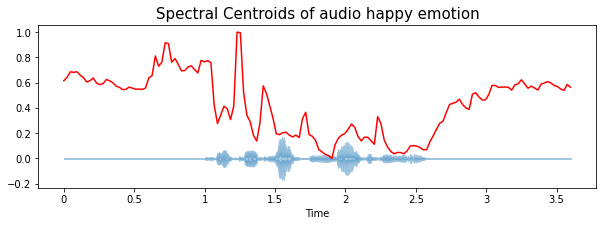

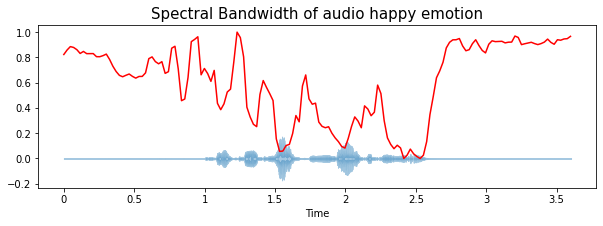

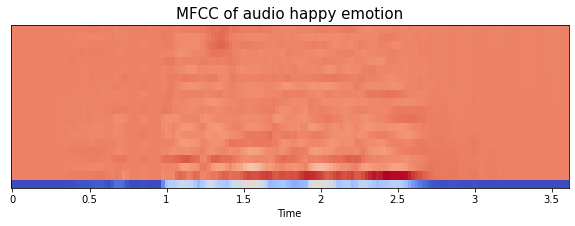

In [50]:
print(" Happy 1: " )
emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[0]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_mel_Spectogram(data, sampling_rate, emotion)
create_Spectogram(data, sampling_rate, emotion)
create_Zero_crossing_rate(data, sampling_rate, emotion)
create_Spectral_centroid(data, sampling_rate, emotion)
create_Spectral_bandwidth(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)

Audio(path)



 Happy 2: 


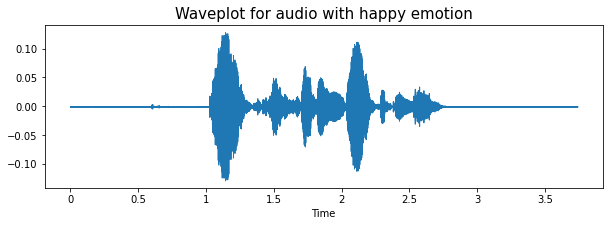

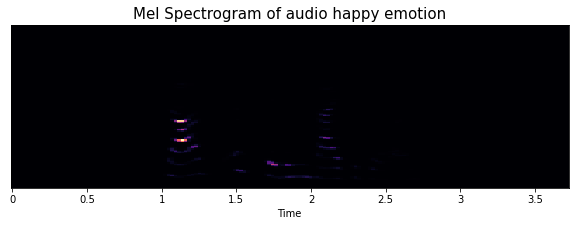

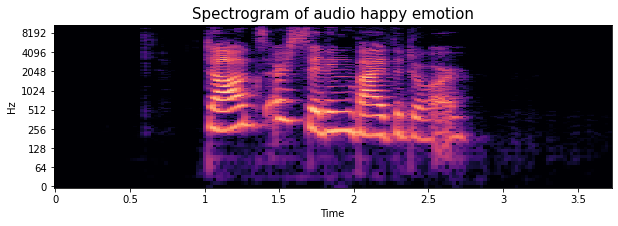

Sum of zero crossing  28943


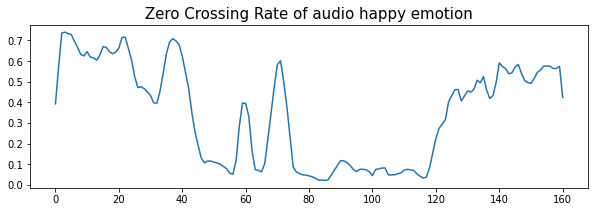

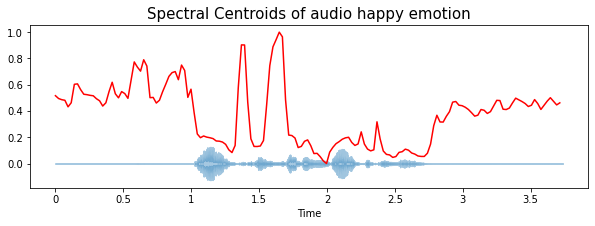

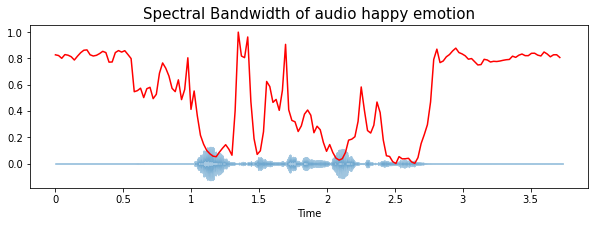

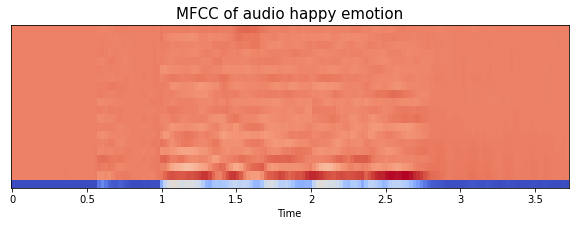

In [51]:
print(" Happy 2: " )

emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[6]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_mel_Spectogram(data, sampling_rate, emotion)
create_Spectogram(data, sampling_rate, emotion)
create_Zero_crossing_rate(data, sampling_rate, emotion)
create_Spectral_centroid(data, sampling_rate, emotion)
create_Spectral_bandwidth(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)

Audio(path)



 Happy 3: 


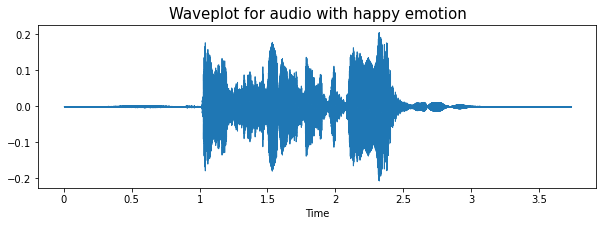

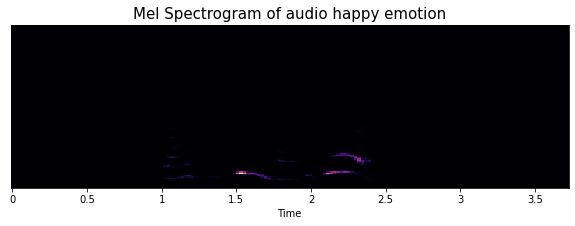

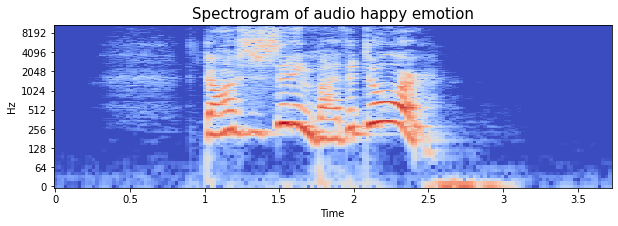

Sum of zero crossing  12673


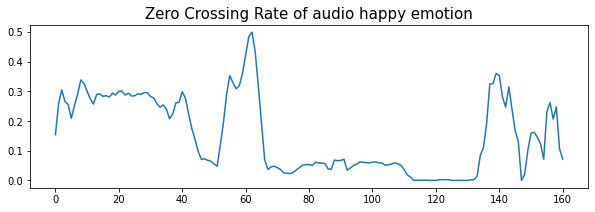

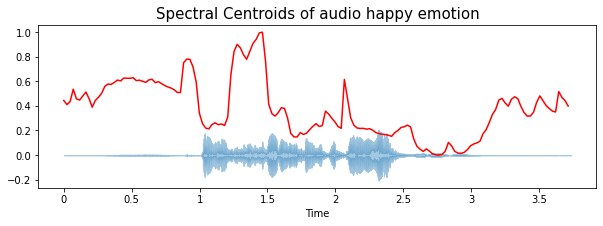

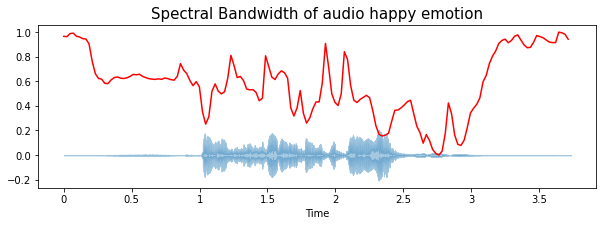

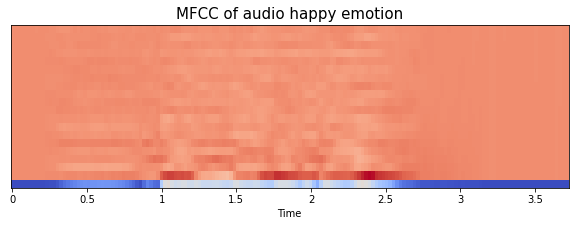

In [52]:
print(" Happy 3: " )

emotion='happy'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[9]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_mel_Spectogram(data, sampling_rate, emotion)
create_Spectogram(data, sampling_rate, emotion)
create_Zero_crossing_rate(data, sampling_rate, emotion)
create_Spectral_centroid(data, sampling_rate, emotion)
create_Spectral_bandwidth(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)

Audio(path)

 Sad 1: 


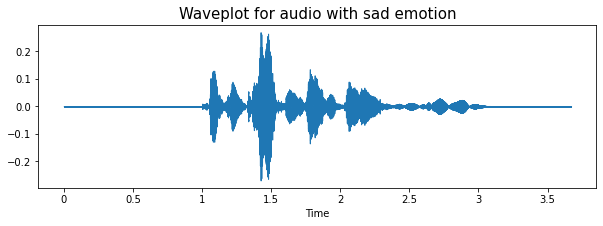

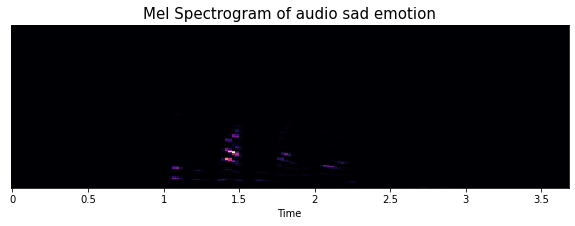

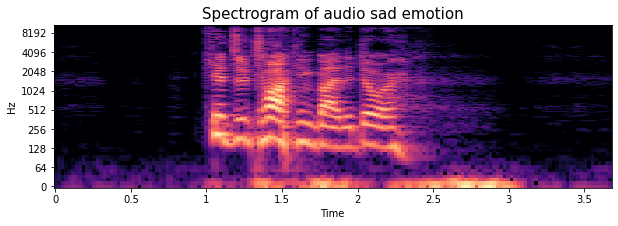

Sum of zero crossing  7623


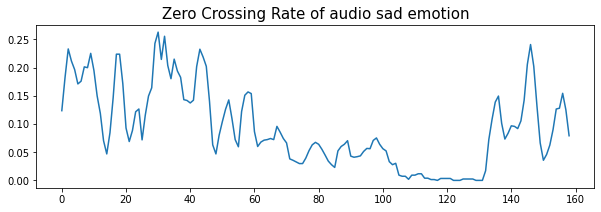

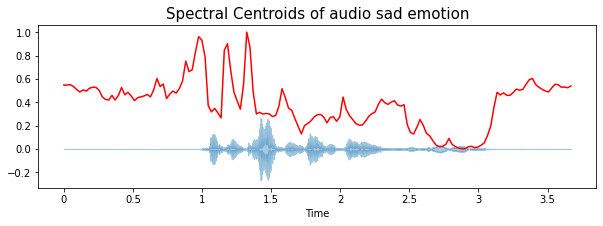

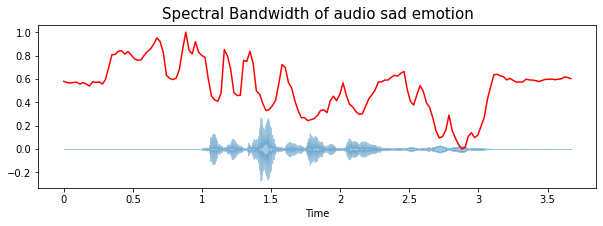

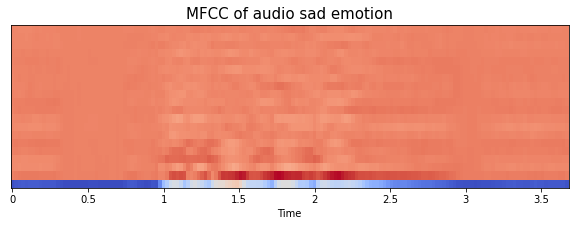

In [55]:
print(" Sad 1: " )

emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[9]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_mel_Spectogram(data, sampling_rate, emotion)
create_Spectogram(data, sampling_rate, emotion)
create_Zero_crossing_rate(data, sampling_rate, emotion)
create_Spectral_centroid(data, sampling_rate, emotion)
create_Spectral_bandwidth(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)

Audio(path)

 Sad 2: 


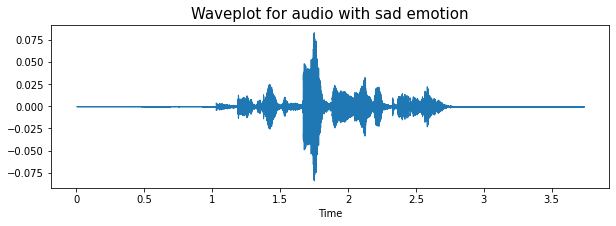

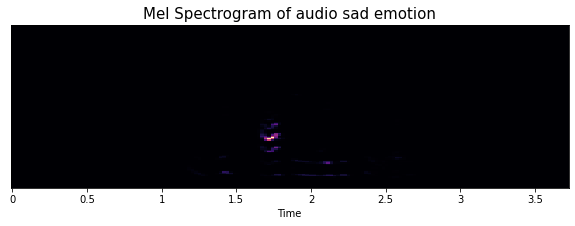

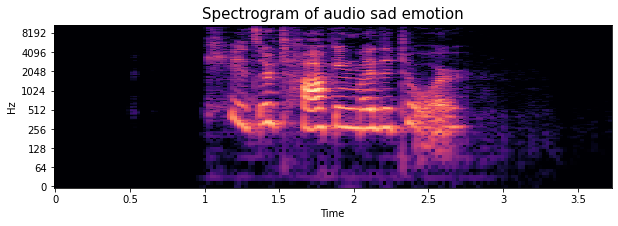

Sum of zero crossing  20865


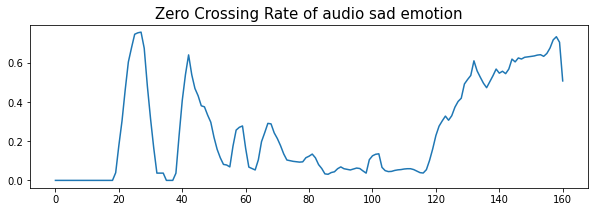

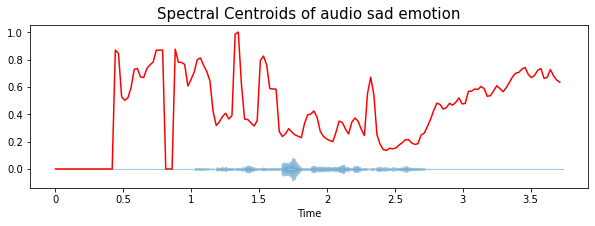

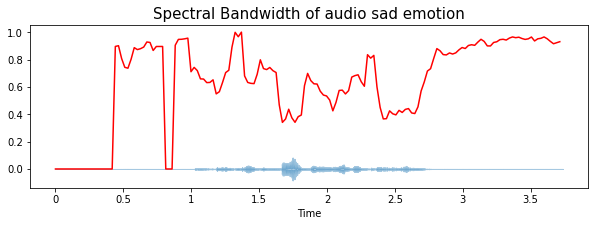

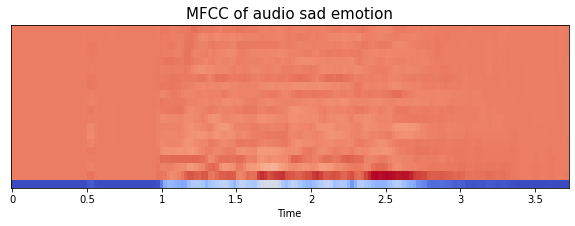

In [56]:
print(" Sad 2: " )

emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[5]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_mel_Spectogram(data, sampling_rate, emotion)
create_Spectogram(data, sampling_rate, emotion)
create_Zero_crossing_rate(data, sampling_rate, emotion)
create_Spectral_centroid(data, sampling_rate, emotion)
create_Spectral_bandwidth(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)

Audio(path)

 Sad 3: 


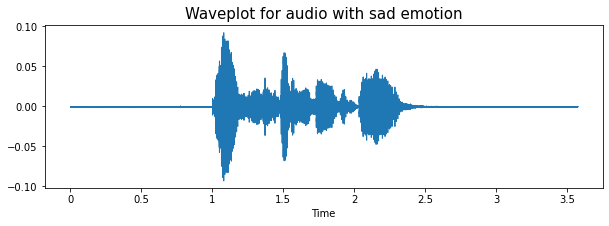

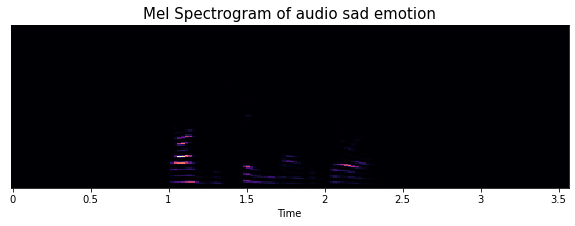

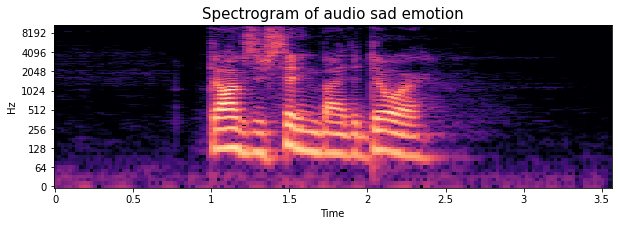

Sum of zero crossing  12767


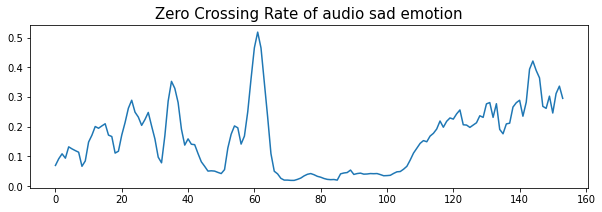

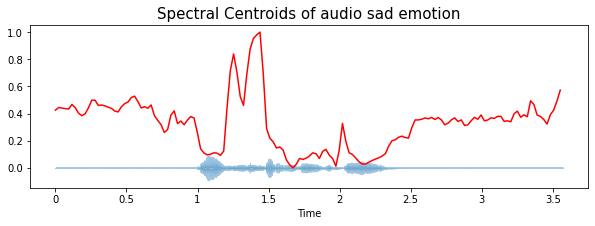

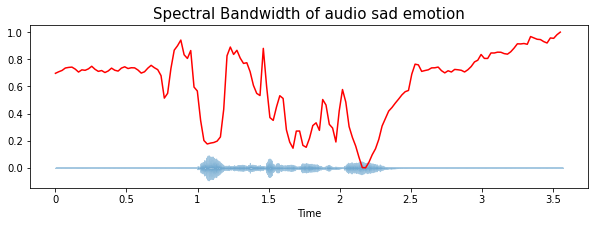

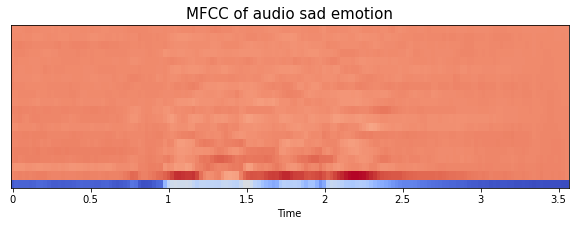

In [57]:
print(" Sad 3: " )

emotion='sad'
path = np.array(Ravdess_df.Path[Ravdess_df.Emotions==emotion])[13]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_mel_Spectogram(data, sampling_rate, emotion)
create_Spectogram(data, sampling_rate, emotion)
create_Zero_crossing_rate(data, sampling_rate, emotion)
create_Spectral_centroid(data, sampling_rate, emotion)
create_Spectral_bandwidth(data, sampling_rate, emotion)
create_mfcc(data, sampling_rate, emotion)

Audio(path)

# Inference

Waveform Happy: The above plot displays many steep data points
Waveform sad: It displays lesser peaks incomparison to the waveforms of happy sounds and it shows a kind of presence of a low tone for sad sounds

Spectrogram Happy: The frequencies are widely spread out for happy audio
Spectrogram sad: Sad frequencies show less spreadness.

The zero-crossing rate (ZCR) : For sad sounds , the signals are much spread out, The signals are more sharp for happy sounds

Spectral centroid : Happy sound signals seems more dominant. Sads sounds are less illuminated due to low tones in which they are spoken

Spectral rolloff: We see highpass roll off in the read line and low pass roll off in the blue bars.


Mel scale: We see more changes in colors when pitches in happy sound change. We see less changes in colors when pitches in sad sound change.


## Task2:
- Extract the MFCC features with 40 components from those 500 audios and build simple logistic regression. Comment on the model output performance. (Try to adjust MFCC components).

In [24]:

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
         os.path.join(dirname, filename) 

In [4]:
def extract_feature(file_name):
    X, sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    result=np.hstack((result, mfccs))
    return result
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

def gender(g):
    if int(g[0:2]) % 2 == 0:
        return 'female'
    else:
        return 'male'

In [5]:
import os, glob, pickle
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [6]:
def load_data(test_size=0.2):
    x,y=[],[]
    for file in tqdm(glob.glob("../input/ravdess-emotional-speech-audio/Actor_*/*.wav")):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
        feature=extract_feature(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=1)

In [11]:
X_train, X_val, y_train, y_val = load_data()

100%|██████████| 1440/1440 [08:44<00:00,  2.75it/s]


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [13]:
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 40


### Model Creation

In [14]:
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression( max_iter = 500)
    
## Accuracy and Confusion Matrix
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))

0.7265625


In [15]:



y_pred=clf.predict(X_val)
print(clf.score(X_val, y_val))
mfcc_pred_acc=clf.score(X_val, y_val)

    

0.5868055555555556


Much Less in accuracy in Test than training

## Task 3:
- Extract the mel spectrogram features with 128 mel bands from those 500 audios and build simple logistic regression. Comment on the model output performance.

In [16]:
def extract_feature_mel(file_name):
    X, sample_rate = librosa.load(file_name)
    stft=np.abs(librosa.stft(X))
    result=np.array([])
    mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate,n_mels=128).T,axis=0)
    result=np.hstack((result, mel))
    return result
def load_data_mel(test_size=0.3):
    x,y=[],[]
    for file in tqdm(glob.glob("../input/ravdess-emotional-speech-audio/Actor_*/*.wav")):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]] + '_' + gender(file_name.split("-")[-1])
        feature=extract_feature_mel(file)
        x.append(feature)
        y.append(emotion)
    return train_test_split(np.array(x), y, test_size=test_size, random_state=1)

In [17]:
X_train, X_val, y_train, y_val = load_data_mel()

100%|██████████| 1440/1440 [08:20<00:00,  2.88it/s]


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
print(f'Features extracted: {X_train.shape[1]}')

Features extracted: 128


## Model Creation



In [19]:
clf=LogisticRegression( max_iter = 500)
clf.fit(X_train,y_train)
print(clf.score(X_train, y_train))

y_pred=clf.predict(X_val)
print(clf.score(X_val, y_val))
mel_pred_acc=clf.score(X_val, y_val)

0.49107142857142855
0.3125


Prediction Accuracy is very less compared to Training accuracy which maybe indicative of overfitting.

## Task 4:
- Compare model results of MFCC and Mel Spectrogram

In [20]:
print(f"\n Prediction Accuracy of MFCC:{mfcc_pred_acc} \n Prediction Accuracy of Mel 128 Bands: {mel_pred_acc}")


 Prediction Accuracy of MFCC:0.5868055555555556 
 Prediction Accuracy of Mel 128 Bands: 0.3125


* It is observed that MFCC performs better than the mel spectrogram with 128 bands.
* As MFCC is a combination of short term power spectrum of any sound so sound clarity and power would give a better perfomance when compared to Mel spectrogram
* The MFCC can be beneficial with linear models like Gaussian Mixture Models as it is more decorrelarated.